In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import os
import matplotlib.pyplot as plt 
# have pie chart fraud vs non fraud, stacking bar charts comparing most fraudulent 'columns'
# consider comparing fraudulent text count in department, vs descrip
# maybe heat map of cities?

In [3]:
df = pd.read_csv('Resources/fake_job_postings_cleaned_v2.csv')

In [4]:
df.head()

,Unnamed: 0,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City,State
0,0,Marketing Intern,Marketing,Were Food52 and weve created a groundbreaking ...,Food52 a fastgrowing James Beard Awardwinning ...,Experience with content management systems a m...,none,0,1,0,Other,Internship,none,none,Marketing,0,US,NY,New York
1,1,Customer Service - Cloud Video Production,Success,90 Seconds the worlds Cloud Video Production S...,OrganisedFocusedVibrantAwesomeDo you have a pa...,What we expect from youYour key responsibility...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,none,Marketing and Advertising,Customer Service,0,NZ,none,Auckland
2,2,Commissioning Machinery Assistant (CMA),none,Valor Services provides Workforce Solutions th...,Our client located in Houston is actively seek...,Implement precommissioning and commissioning p...,none,0,1,0,none,none,none,none,none,0,US,IA,Wever
3,3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY ESRIEnvironmental Systems Research...,EDUCATION Bachelors or Masters in GIS business...,Our culture is anything but corporatewe have a...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,4,Bill Review Manager,none,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review ManagerLOCATION F...,QUALIFICATIONSRN license in the State of Texas...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [51]:
df = df.drop(columns=['Unnamed: 0'])

In [26]:
# Fraud df and non fraud df
fraud_df = df[df['fraudulent'] == 1]
non_fraud_df = df[df['fraudulent'] == 0]

# counts of df
total_count = len(df.index)
fraud_count = len(fraud_df.index)
non_fraud_count = len(non_fraud_df.index)

print(non_fraud_count, fraud_count, total_count)

17014 866 17880


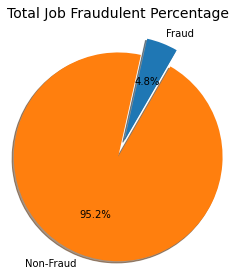

In [83]:
# pie chart - % fraud vs non fraud
labels = 'Fraud', 'Non-Fraud'
data = [fraud_count, non_fraud_count]

# customizations
explode = [0.2,0]
plt.title('Total Job Fraudulent Percentage', pad=30, fontsize=14)

plot = plt.pie(data, labels=labels, explode = explode, shadow = True, autopct='%1.1f%%',startangle=60, radius=1.2)


In [8]:
df['required_education'].value_counts()

none                                 8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [36]:
df['required_experience'].value_counts()
dfe = df[['fraudulent','required_experience']]
dfe.head(5)


,fraudulent,required_experience
0,0,Internship
1,0,Not Applicable
2,0,none
3,0,Mid-Senior level
4,0,Mid-Senior level


In [42]:
# fraudulent
dfe_fraud = dfe[dfe['fraudulent'] == 1]
dfe_fraud = dfe_fraud.groupby(['required_experience']).count()
dfe_fraud.head()

,fraudulent
required_experience,
Associate,42
Director,17
Entry level,179
Executive,10
Internship,10


In [41]:
# non-fraudulent
dfe_nonfraud = dfe[dfe['fraudulent'] == 0]
dfe_nonfraud = dfe_nonfraud.groupby(['required_experience']).count()
dfe_nonfraud.head()

,fraudulent
required_experience,
Associate,2255
Director,372
Entry level,2518
Executive,131
Internship,371


<AxesSubplot:title={'center':'Fraudulent rate based on Experience'}, xlabel='Experience', ylabel='Count'>

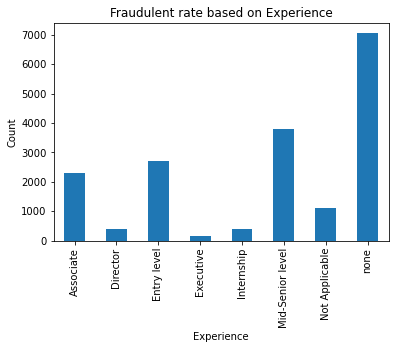

In [27]:
# Required experience summary - 1 bar chart with max, and diff colour represet % that are fraud
dfg.plot(kind='bar', title='Fraudulent rate based on Experience', ylabel='Count', xlabel='Experience')


In [8]:
df_fraud = df['fraudulent']
df_depart = df.groupby("department").filter(lambda x: len(x) >= 30)

df.plot.bar(x=df_depart, stacked=True, title='The number of Students')

ValueError: Boolean array expected for the condition, not object

# Cities, Countries, States

In [11]:
df_location = df[['State','City','Country','fraudulent']]
df_location.head(5)

,State,City,Country,fraudulent
0,New York,NY,US,0
1,Auckland,none,NZ,0
2,Wever,IA,US,0
3,Washington,DC,US,0
4,Fort Worth,FL,US,0


In [99]:
# https://parthsamin.medium.com/heatmap-with-python-and-googlemaps-tutorial-b3d623b77c95 <- check for guide

count_state = df['State'].value_counts() 

count.head(50)

# group none and others and bin < 100?

none              2068
London            1089
New York           685
Athens             547
San Francisco      485
Houston            272
Berlin             263
Chicago            258
Washington         255
Auckland           234
Los Angeles        192
Austin             178
San Diego          166
Atlanta            151
Portland           133
Toronto            128
Philadelphia       122
Boston             120
Brooklyn           114
Detroit            112
Dallas             105
Dublin             101
Virginia Beach      95
Cleveland           95
Cincinnati          92
Charlotte           91
St. Louis           89
New York City       85
Sydney              84
Vancouver           84
Las Vegas           82
Phoenix             81
Santa Monica        80
Brussels            73
Cambridge           71
Tallinn             67
Birmingham          66
Minneapolis         61
Albany              61
Seattle             59
Miami               57
Orlando             55
Jacksonville        54
Milwaukee  

In [103]:
count_city = df['City'].value_counts() 
count_city.head(30)

none    2580
CA      2051
NY      1259
LND      992
TX       975
I        688
IL       424
FL       415
OH       372
VA       332
MA       321
PA       316
MI       286
DC       276
N        274
GA       238
ON       236
BE       236
NC       225
NJ       193
OR       187
MN       183
WA       173
MO       160
AZ       156
WI       152
TN       136
CO       134
CT       120
IN       119
Name: City, dtype: int64

In [104]:
count_country = df['Country'].value_counts() 
count_country.head(30)

US      10656
GB       2384
GR        940
CA        457
DE        383
none      346
NZ        333
IN        276
AU        214
PH        132
NL        127
BE        117
IE        114
SG         80
HK         77
PL         76
EE         72
IL         72
FR         70
ES         66
AE         54
EG         52
SE         49
RO         46
DK         42
ZA         40
BR         36
IT         31
FI         29
PK         27
Name: Country, dtype: int64

In [ ]:
# heatmap 